# 신경망을 사용한 MNIST 손글씨 인식하기
* 미국 국립표준기술원(NIST)에서 고등학생과 인구조사국 직원 등이 쓴 손글씨를 수집하여 만든 70,000개의 숫자 손글씨 데이터셋

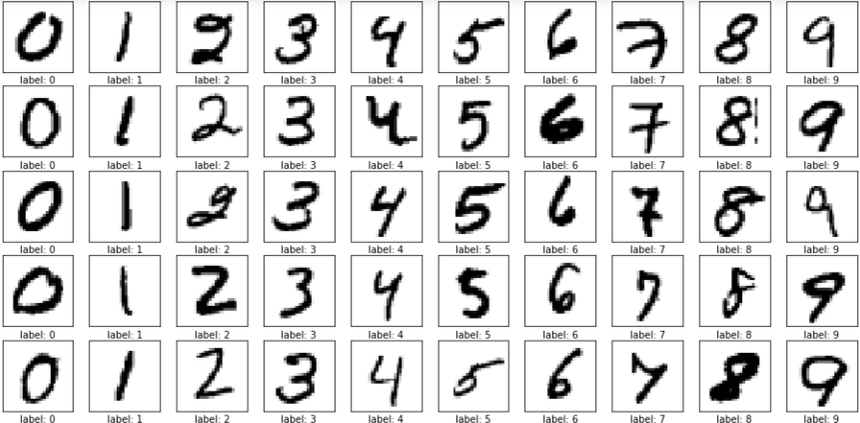
* 총 70000개의 데이터 
* 학습용데이터 60000
* 테스트용 데이터 10000
* 손글씨 한 장의 이미지는 28 x 28 = 784개의 픽셀로 구성

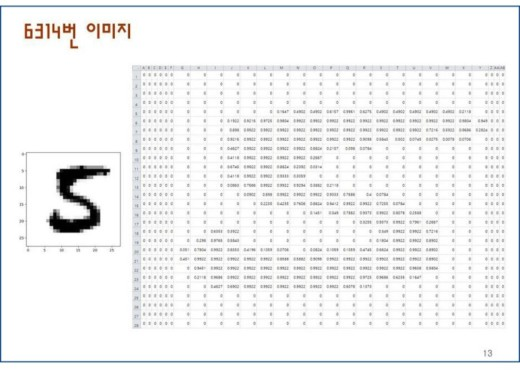

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#판다스는 전처리가 끝난 데이터를 다룰때는 필요가 없다.



In [ ]:
(train_input, train_target), (test_input, test_target) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
print(train_input[0])

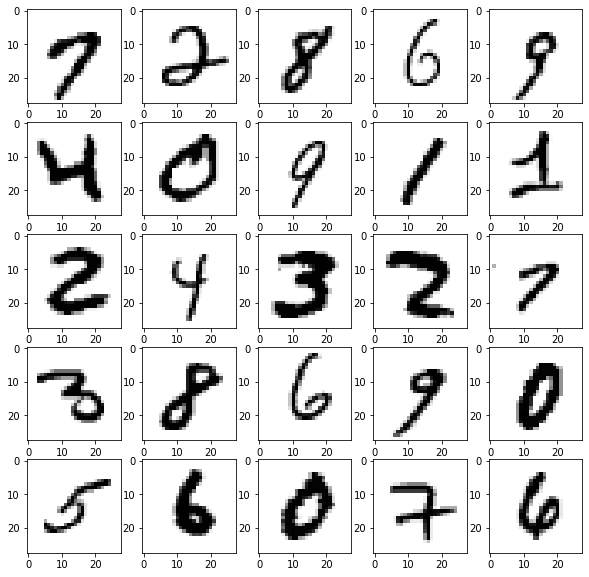

In [ ]:
fig, axs = plt.subplots(5, 5, figsize = (10, 10))
for i in range(5):
  for j in range(5):
    axs[i, j].imshow(train_input[i*5 + j + 150], cmap='gray_r')
plt.show()

In [ ]:
print(train_target[11])

5


In [ ]:
np.unique(train_target, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
train_target_OHE = tf.keras.utils.to_categorical(train_target, num_classes = 10)
test_target_OHE = tf.keras.utils.to_categorical(test_target, num_classes = 10)
print(train_target.shape, train_target_OHE.shape)
print(test_target.shape, test_target_OHE.shape)
print(train_target_OHE[:10])

(60000,) (60000, 10)
(10000,) (10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


#정규화
값을 0~1 사이의 데이터로 바꿔주는 스케일링

255로 나눠줄거라고 하는데, 시프팅만 해줘도 괜찮지 않나? 더 연산이 많이드나?

In [ ]:
train_input_NOM = train_input/255
test_input_NOM = test_input/255
print(train_input_NOM[:10, 14])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.31764706 0.94117647 0.99215686 0.99215686 0.46666667
  0.09803922 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.77647059 0.99215686 0.74509804 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.99215686 0.76862745 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.62352941 0.99607843 0.33333333
  0.         0.         0.         0.18431373 0.19215686 0.45490196
  0.56470588 0.58823529 0.94509804 0.95294118 0.91764706 0.70196078
  0.94509804 0.98823529 0.15686275 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0

In [ ]:
#28 * 28 데이터를 직렬화 해주기
train_input_lin= train_input_NOM.reshape(-1, 28*28)
test_input_lin = test_input_NOM.reshape(-1, 28*28)

In [ ]:
from tensorflow.keras import models, layers

dense1 = layers.Dense(100, activation ='sigmoid', input_shape  = (784,))
dense2= layers.Dense(50, activation = 'relu')
dense3 = layers.Dense(10, activation='softmax')
model = models.Sequential([dense1, dense2, dense3])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


# Loss 함수의 종류

## RMSE(Root Mean Squared Error)

 

MSE에 루트(√)를 씌운 것으로 MSE와 기본적으로 동일하다. MSE 값은 오류의 제곱을 구하기 때문에 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 은 값의 왜곡을 줄여준다.

 

## Binary Crossentropy
 

실제 레이블과 예측 레이블 간의 교차 엔트로피 손실을 계산한다. 레이블 클래스(0, 1로 가정)가 2개만 존재할 때 Binary Crossentropy를 사용하면 좋다. 

 

## Categorical Crossentropy


다중 분류 손실함수로 출력값이 one-hot encoding 된 결과로 나오고 실측 결과와의 비교시에도 실측 결과는 

one-hot encoding 형태로 구성된다.

예를 들면 출력 실측값이 아래와 같은 형태(one-hot encoding)로 만들어 줘야 하는 과정을 거쳐야 한다.
[[0 0 1]
 [0 1 0]
 [1 0 0]]  (배치 사이즈 3개인 경우)

네트웍 레이어 구성시 마지막에 Dense(3, activation='softmax') 로 3개의 클래스 각각 별로 positive 확률값이 나오게 된다.


[0.2, 0.3, 0.5]


위 네트웍 출력값과 실측값의 오차값을 계산한다.


In [ ]:
model.fit(train_input_lin, train_target_OHE, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.3671 - acc: 0.8984
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1740 - acc: 0.9483
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1282 - acc: 0.9614
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1015 - acc: 0.9695
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0860 - acc: 0.9741
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0746 - acc: 0.9779
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0655 - acc: 0.9808
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0576 - acc: 0.9828
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - acc: 0.9848
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0476 - acc: 0.9853


In [ ]:
model.evaluate(test_input_lin, test_target_OHE)

313/313 [==============================] - 1s 3ms/step - loss: 0.1065 - acc: 0.9702


[0.10649105161428452, 0.9702000021934509]

In [ ]:
pred = model.predict(test_input_lin[11:12])
print(np.round(pred, decimals = 3))
pred_index = np.argmax(pred, axis= 1)
print(pred_index)
print(test_target[11:12])

[[0.    0.    0.    0.    0.    0.    0.999 0.    0.001 0.   ]]
[6]
[6]
